# User input

In [1]:
#start_year_past = 2021
#stop_year_past = 2040
#start_year_future = 2041
#stop_year_future = 2060

tuple_error_bar = ('pi',80)
name_project = 'WTP_Mutua_EIB'
name_city = 'Mutua'

# Import packages

In [2]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math
import seaborn as sns

from Functions_Indicators import add_year_month_season
from Functions_Indicators import filter_dataframe
from Functions_Indicators import find_name_col

#from Graphs_presentation_seaborn import trends_year

# Import data

## Temperature

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tas','tas_Celsius_day_1950-2100','tas_1950-2100_projectsMoz.csv')
tas_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])

In [4]:
# list of project available in this dataframe
tas_clim_var.index.levels[0]

Index(['Chimoio_WTP_EIB', 'Gorongosa_EIB', 'Pemba_EIB', 'WTP_Mutua_EIB'], dtype='object', name='Name project')

In [5]:
list_model_to_kill = ['TaiESM1','CMCC-CM2-SR5'] # determinated by comparing observed data and modeled data.
# Modeled data with those models are not following the same trend as for observed data

In [6]:
tas_clim_var_filtered=filter_dataframe(tas_clim_var,name_project,list_model_to_kill)
tas_clim_var_filtered

,Name project,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,01-01-1950,30.038757,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,02-01-1950,30.407043,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,03-01-1950,30.592712,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,04-01-1950,31.287659,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,05-01-1950,25.517853,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2209359,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,27-12-2100,33.455231,2100,Dec,Humid
2209360,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,28-12-2100,33.220306,2100,Dec,Humid
2209361,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,29-12-2100,33.295776,2100,Dec,Humid
2209362,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,30-12-2100,33.413116,2100,Dec,Humid


We saw in another Python notebook that model 'TAIESM1' and 'CMCC-CM2-SR5' must be killed because do not follow the behaviour of temperature for the average temperature.

## Temperature maximum

In [7]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tasmax','tasmax_Celsius_day_1950-2100','tasmax_1950-2100_projectsMoz.csv')
tasmax_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])

In [8]:
# we delete the models not working for temperature, also for tasmax
tasmax_clim_var_filtered=filter_dataframe(tasmax_clim_var,name_project,list_model_to_kill)

In [9]:
tasmax_clim_var_filtered

,Name project,Experiment,Model,Latitude,Longitude,Date,Daily Maximum Near-Surface Air Temperature °C,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,01-01-1950,35.320282,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,02-01-1950,36.137665,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,03-01-1950,36.790802,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,04-01-1950,38.028870,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,05-01-1950,30.809021,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
2059974,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,27-12-2100,39.643280,2100,Dec,Humid
2059975,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,28-12-2100,38.232727,2100,Dec,Humid
2059976,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,29-12-2100,38.471527,2100,Dec,Humid
2059977,WTP_Mutua_EIB,ssp370,NorESM2-MM,-19.375,34.625,30-12-2100,38.699799,2100,Dec,Humid


## Incremental air temperature change

In [10]:
#from Functions_Indicators import yearly_avg

In [11]:
def yearly_avg(df,title_column,climate_var_longName):
    df_yearly_avg = df.copy(deep =True)
    #df_yearly_avg=df_yearly_avg.drop(['Date','Month','Season'],axis=1)
    old_title_column=find_name_col(df,climate_var_longName)
    df_yearly_avg=df_yearly_avg.rename(columns={old_title_column:'Yearly average '+climate_var_longName})
    df_yearly_avg = df_yearly_avg.groupby(['Experiment','Model','Year'])[['Yearly average '+climate_var_longName]].mean() # .sum() for precipitaitonsum per year
    #df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
    return df_yearly_avg

In [12]:
tas_yearly_avg=yearly_avg(tas_clim_var_filtered,'Daily Near-Surface Air Temperature °C','temperature')
tas_yearly_avg

Yearly average temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   25.203555
                      1951                   24.747717
                      1952                   25.015565
                      1953                   24.473332
                      1954                   24.669184
...                                                ...
ssp585     NorESM2-MM 2096                   28.976463
                      2097                   30.096728
                      2098                   29.380016
                      2099                   29.806842
                      2100                   30.238027

[5317 rows x 1 columns]

In [13]:
tas_yearly_avg=tas_yearly_avg.reset_index()

Text(0.5, 1.0, 'Average yearly temperature °C, depending on scenario and\naccross models, between 1950 to 2100 at Mutua\ndata modeled with NEX-GDDP-CMIP6')

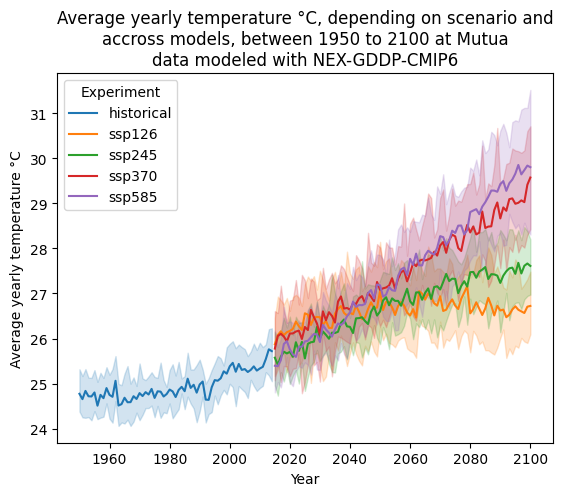

In [14]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',hue='Experiment',errorbar=tuple_error_bar)
plt.ylabel('Average yearly temperature °C')
plt.title('Average yearly temperature °C, depending on scenario and\naccross models, between 1950 to 2100 at '+name_city+'\ndata modeled with NEX-GDDP-CMIP6')

In [29]:
# cdf of temperature 

tas_yearly_avg_sort = tas_yearly_avg.sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_sort

,Experiment,Model,Year,Yearly average temperature
461,historical,MPI-ESM1-2-HR,1956,23.333962
371,historical,IITM-ESM,1996,23.662663
275,historical,CanESM5,1965,23.803645
264,historical,CanESM5,1954,23.829337
693,historical,NESM3,1993,23.863486
...,...,...,...,...
4619,ssp585,CanESM5,2091,31.895317
4284,ssp585,ACCESS-CM2,2100,31.927176
4627,ssp585,CanESM5,2099,32.292206
3506,ssp370,CanESM5,2096,32.600856


In [47]:
tas_yearly_avg_historical = tas_yearly_avg[tas_yearly_avg['Experiment']=='historical'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_historical['CDF'] = np.arange(len(tas_yearly_avg_historical)) / float(len(tas_yearly_avg_historical))

tas_yearly_avg_ssp126 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp126'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp126['CDF'] = np.arange(len(tas_yearly_avg_ssp126)) / float(len(tas_yearly_avg_ssp126))

tas_yearly_avg_ssp245 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp245'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp245['CDF'] = np.arange(len(tas_yearly_avg_ssp245)) / float(len(tas_yearly_avg_ssp245))

tas_yearly_avg_ssp370 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp370'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp370['CDF'] = np.arange(len(tas_yearly_avg_ssp370)) / float(len(tas_yearly_avg_ssp370))

tas_yearly_avg_ssp585 = tas_yearly_avg[tas_yearly_avg['Experiment']=='ssp585'].sort_values('Yearly average temperature',na_position='first').dropna()
tas_yearly_avg_ssp585['CDF'] = np.arange(len(tas_yearly_avg_ssp585)) / float(len(tas_yearly_avg_ssp585))

df_lines = pd.concat([tas_yearly_avg_historical,tas_yearly_avg_ssp126,tas_yearly_avg_ssp245,tas_yearly_avg_ssp370,tas_yearly_avg_ssp585])

In [53]:
df_lines = df_lines.drop('Year',axis=1)

In [55]:
df_lines

,Experiment,Model,Yearly average temperature,CDF
461,historical,MPI-ESM1-2-HR,23.333962,0.000000
371,historical,IITM-ESM,23.662663,0.001183
275,historical,CanESM5,23.803645,0.002367
264,historical,CanESM5,23.829337,0.003550
693,historical,NESM3,23.863486,0.004734
...,...,...,...,...
4621,ssp585,CanESM5,31.817265,0.995524
4619,ssp585,CanESM5,31.895317,0.996419
4284,ssp585,ACCESS-CM2,31.927176,0.997314
4627,ssp585,CanESM5,32.292206,0.998209


Text(0.5, 1.0, 'Cumulative distribution function of the yearly average temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')

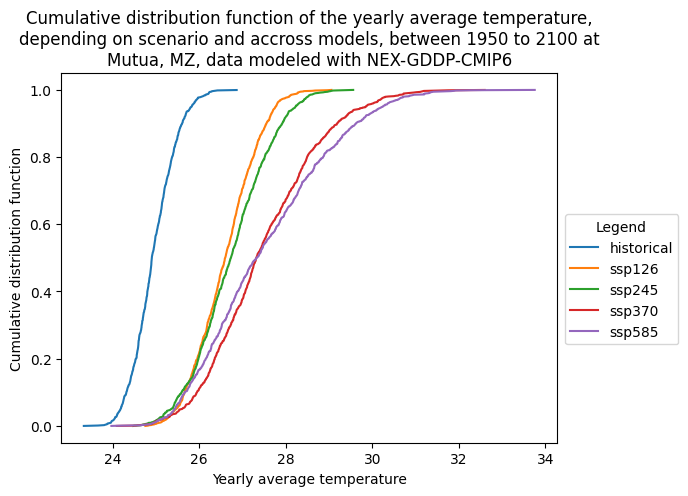

In [69]:
fig,ax=plt.subplots()
sns.lineplot(data=df_lines,x='Yearly average temperature',y='CDF',hue='Experiment',errorbar =('pi',80))
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the yearly average temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')

In [64]:
df_lineS = pd.DataFrame()

for ssp in list(set(tas_yearly_avg['Experiment'])):
    tas_yearly_avg_modif = tas_yearly_avg[tas_yearly_avg['Experiment']==ssp]
    for model in list(set(tas_yearly_avg_modif['Model'])):
        tas_yearly_avg_modif2 = tas_yearly_avg_modif[tas_yearly_avg['Model']==model]
        tas_yearly_avg_modif2 = tas_yearly_avg_modif2.sort_values('Yearly average temperature',na_position='first').dropna()
        tas_yearly_avg_modif2['CDF'] = np.arange(len(tas_yearly_avg_modif2)) / float(len(tas_yearly_avg_modif2))
        df_lineS = pd.concat([df_lineS,tas_yearly_avg_modif2])

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_28968\2169223465.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tas_yearly_avg_modif2 = tas_yearly_avg_modif[tas_yearly_avg['Model']==model]
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_28968\2169223465.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tas_yearly_avg_modif2 = tas_yearly_avg_modif[tas_yearly_avg['Model']==model]
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_28968\2169223465.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tas_yearly_avg_modif2 = tas_yearly_avg_modif[tas_yearly_avg['Model']==model]
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_28968\2169223465.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tas_yearly_avg_modif2 = tas_yearly_avg_modif[tas_yearly_avg['Model']==model]
C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_28968\2169223465.py:6: UserWarning: Boolean Series key wil

In [67]:
df_lineS = df_lineS.drop('Year',axis=1)

Text(0.5, 1.0, 'Cumulative distribution function of the yearly average temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')

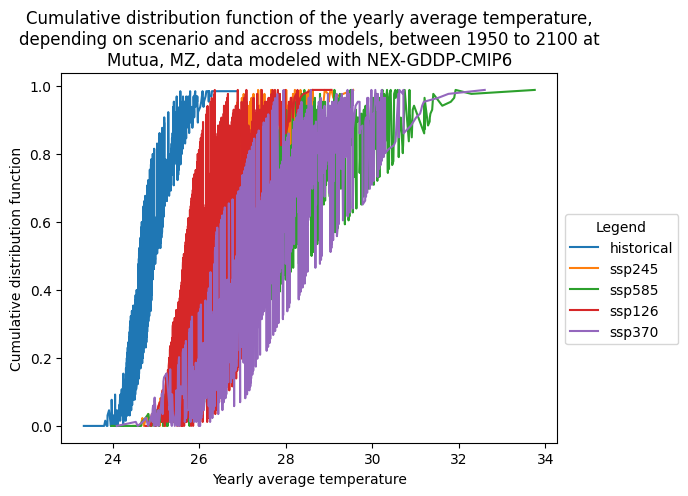

In [68]:
fig,ax=plt.subplots()
sns.lineplot(data=df_lineS,x='Yearly average temperature',y='CDF',hue='Experiment')
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the yearly average temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')

## number of days with temperatures above 40 degres

In [ ]:
def number_day_above_threshold(df,climate_var_longName,threshold):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    new_name='Average annual number of days with '+climate_var_longName+' above '+str(threshold)
    #df = df.rename(columns={old_title_column:new_name})
    
    df = df.drop(['Date','Month','Season'],axis=1) 
    df=df.reset_index()
    #df=df.groupby(['Experiment','Model','Year']).apply(lambda x: x[x[new_name]>40].count()).reset_index()
    df[new_name]=0
    df[new_name].iloc[np.where(df[old_title_column]>40)[0]]=1    
    df = df.groupby(['Experiment','Model','Year'])[[new_name]].sum()
    
    return df

In [ ]:
max_tas_over_40 = number_day_above_threshold(tasmax_clim_var_filtered,'temperature',40)
max_tas_over_40 

In [ ]:
max_tas_over_40 = max_tas_over_40.reset_index()

In [ ]:
max_tas_over_40 = max_tas_over_40[max_tas_over_40['Model']!='TaiESM1']

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Model',errorbar=('pi',80))
plt.ylabel('Number of days with temperature above 40°C')
plt.title('Number of days with temperature above 40°C, depending on model,\n accross scenarios between 1950 to 2100 at '+name_city)
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 0.88),title='Legend')

In [ ]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Experiment',errorbar=('pi',80))
#plt.ylim(0,100)
plt.ylabel('Number of days with maximum temperature above 40°C')
plt.title('Number of days with maximum temperature above 40°C, depending on\nscenario, accross model, between 1950 to 2100 at '+name_city+'\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')


In [ ]:
fig,ax = plt.subplots()
sns.lineplot(max_tas_over_40[(max_tas_over_40['Experiment']=='ssp370') | (max_tas_over_40['Experiment']=='historical')],x='Year',y='Average annual number of days with temperature above 40',hue='Experiment',errorbar=('pi',80))
plt.ylabel('Number of days with temperature above 40°C')
plt.title('Number of days with temperature above 40°C for ssp370,\n accross models, between 1950 to 2100 at '+name_city+'\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')

## Maximum temperature in year

In [ ]:
# mettre les max pour donnees

In [70]:
def max_per_year_for_each_model_ssp(df,climate_var_longName):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    df = df.rename(columns={old_title_column:'Yearly maximum '+climate_var_longName})
    df = df.drop(['Date','Month','Season'],axis=1)
    df = df.groupby(['Experiment','Model','Year'])[['Yearly maximum '+climate_var_longName]].max()
    return df

In [71]:
df=max_per_year_for_each_model_ssp(tasmax_clim_var_filtered,'temperature')

In [72]:
df

Yearly maximum temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   39.152191
                      1951                   37.526184
                      1952                   38.767029
                      1953                   38.486023
                      1954                   36.903870
...                                                ...
ssp585     NorESM2-MM 2096                   44.033295
                      2097                   43.226624
                      2098                   45.039642
                      2099                   44.009979
                      2100                   44.822144

[4908 rows x 1 columns]

In [73]:
df=df.reset_index()

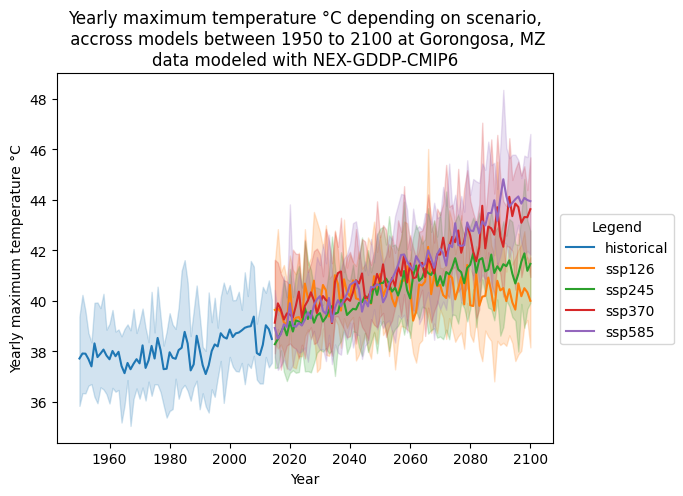

In [74]:
fig,ax = plt.subplots()
sns.lineplot(df,x='Year',y='Yearly maximum temperature',hue='Experiment',errorbar=('pi',80))# ajouter les donnes obs
plt.ylabel('Yearly maximum temperature °C')
plt.title('Yearly maximum temperature °C depending on scenario,\n accross models between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')
handles, labels=ax.get_legend_handles_labels()
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')

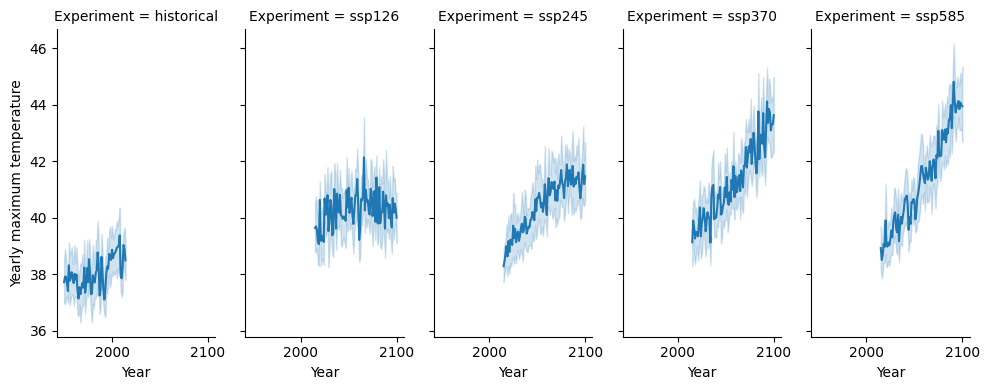

In [75]:
g = sns.FacetGrid(df, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Yearly maximum temperature')

In [76]:
trends_year('tas',df,'NEX-GDDP-CMIP6','mean','gorongosa',1960,2100)

NameError: name 'trends_year' is not defined

In [85]:
tas_yearly_max_historical = df[df['Experiment']=='historical'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_historical['CDF'] = np.arange(len(tas_yearly_max_historical)) / float(len(tas_yearly_max_historical))

tas_yearly_max_ssp126 = df[df['Experiment']=='ssp126'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp126['CDF'] = np.arange(len(tas_yearly_max_ssp126)) / float(len(tas_yearly_max_ssp126))

tas_yearly_max_ssp245 = df[df['Experiment']=='ssp245'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp245['CDF'] = np.arange(len(tas_yearly_max_ssp245)) / float(len(tas_yearly_max_ssp245))

tas_yearly_max_ssp370 = df[df['Experiment']=='ssp370'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp370['CDF'] = np.arange(len(tas_yearly_max_ssp370)) / float(len(tas_yearly_max_ssp370))

tas_yearly_max_ssp585 = df[df['Experiment']=='ssp585'].sort_values('Yearly maximum temperature',na_position='first').dropna()
tas_yearly_max_ssp585['CDF'] = np.arange(len(tas_yearly_max_ssp585)) / float(len(tas_yearly_max_ssp585))

df_lines = pd.concat([tas_yearly_max_historical,tas_yearly_max_ssp126,tas_yearly_max_ssp245,tas_yearly_max_ssp370,tas_yearly_max_ssp585])

In [86]:
tas_yearly_max_ssp585 = df[df['Experiment']=='ssp585'].sort_values('Yearly maximum temperature',na_position='first').dropna()

In [87]:
tas_yearly_max_ssp585

,Experiment,Model,Year,Yearly maximum temperature
4485,ssp585,MPI-ESM1-2-LR,2022,35.894684
4737,ssp585,NorESM2-LM,2016,35.972076
4478,ssp585,MPI-ESM1-2-LR,2015,36.059845
3885,ssp585,ACCESS-CM2,2024,36.458618
4499,ssp585,MPI-ESM1-2-LR,2036,36.543427
...,...,...,...,...
4641,ssp585,MRI-ESM2-0,2092,47.665771
4389,ssp585,MIROC6,2098,48.029480
4649,ssp585,MRI-ESM2-0,2100,48.055176
4726,ssp585,NESM3,2091,48.518372


Text(0.5, 1.0, 'Cumulative distribution function of the yearly maximum temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')

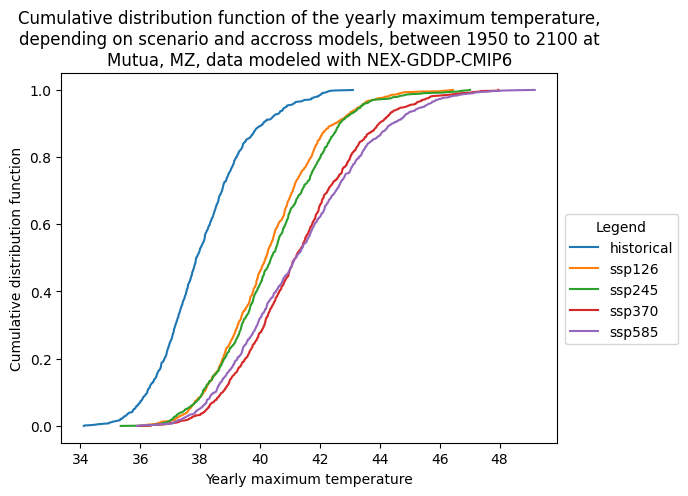

In [88]:
fig,ax=plt.subplots()
sns.lineplot(data=df_lines,x='Yearly maximum temperature',y='CDF',hue='Experiment',errorbar =('pi',80))
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
plt.ylabel('Cumulative distribution function')
plt.title('Cumulative distribution function of the yearly maximum temperature,\ndepending on scenario and accross models, between 1950 to 2100 at\nMutua, MZ, data modeled with NEX-GDDP-CMIP6')